In [1]:
TEST = False

Check which hyper-parameters are required by TransE:

In [2]:
from pykeen.kge_models import TransE
TransE.hyper_params

['embedding_dim',
 'margin_loss',
 'learning_rate',
 'corrupt_relations',
 'scoring_function',
 'normalization_of_entities']

Train and evaluate Region (provide test set):
* Define the path to our test set: **test_set_path**
* Define the path to our the negative test set: **neg_test_path** in case of triple classfication evaluation
* Define whether you want to compute the metrics (mean rank and hits@k) in raw or in a filtered setting: **filter_negative_triples**

In [14]:
config = dict(
    metrics                     = [],    
    training_set_path           = 'D:/uni/master/data/FB15K/train.tsv',
    test_set_path               = 'D:/uni/master/data/FB15K/valid_150.tsv',
    mapping_path                = 'D:/uni/master/data/fb15k/',
    
    execution_mode              = 'Training_mode',
    random_seed                 = 2,
    kg_embedding_model_name     = 'TransE',
    embedding_dim               = 50,
    scoring_function            = 1,  # corresponds to L1
    normalization_of_entities   = 2,  # corresponds to L2
    margin_loss                 = 1,
    es_metric                   = 'custom',
    
    learning_rate               = 0.01,
    num_epochs                  = 1000,  
    batch_size                  = 2048,
    test_batch_size             = 6000,
    filter_negative_triples     = False,
    corrupt_relations           = False,
    neg_factor                  = 2,
    preferred_device            = 'gpu'
)

In [18]:
output_directory = 'D:/uni/master/models/TransE_FB15k_dim{}_lr{}_margin{}_epochs{}_bs{}/'.format(
    config['embedding_dim'],
    str(config['learning_rate']).replace('.',''),
    config['margin_loss'],
    config['num_epochs'],
    config['batch_size']
)
output_directory

'D:/uni/master/models/TransE_FB15k_dim50_lr001_margin1_epochs1000_bs2048/'

In [19]:
if TEST:
    output_directory = 'D:/uni/master/models/test/'

In [20]:
import logging
import os
import sys
import time
import pykeen

In [21]:
logging.basicConfig(level=logging.DEBUG)
logging.getLogger('pykeen').setLevel(logging.DEBUG)

In [22]:
print(sys.version)

3.6.8 |Anaconda, Inc.| (default, Feb 21 2019, 18:30:04) [MSC v.1916 64 bit (AMD64)]


In [23]:
print(time.asctime())

Tue Jun 25 23:04:42 2019


In [24]:
print(pykeen.get_version())

0.0.26-dev


## Train and evaluate TransE:

In [25]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
%matplotlib inline

DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [27]:
# my
results = pykeen.run(
    config=config,
    output_directory=output_directory,
)

DEBUG:pykeen.utilities.pipeline:Reading the label mappings...


{'metrics': [], 'training_set_path': 'D:/uni/master/data/FB15K/train.tsv', 'test_set_path': 'D:/uni/master/data/FB15K/valid_150.tsv', 'mapping_path': 'D:/uni/master/data/fb15k/', 'execution_mode': 'Training_mode', 'random_seed': 2, 'kg_embedding_model_name': 'TransE', 'embedding_dim': 50, 'scoring_function': 1, 'normalization_of_entities': 2, 'margin_loss': 1, 'es_metric': 'custom', 'learning_rate': 0.01, 'num_epochs': 1000, 'batch_size': 2048, 'test_batch_size': 6000, 'filter_negative_triples': False, 'corrupt_relations': False, 'neg_factor': 2, 'preferred_device': 'gpu', 'pykeen-version': '0.0.26-dev', 'num_entities': 14951, 'num_relations': 1345}


INFO:pykeen.utilities.pipeline:-------------Train KG Embeddings-------------
DEBUG:pykeen.utilities.train_utils:****running model on cuda:0****
INFO:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.28s seconds


0.11556521349182504 (0.08844668783163596, 0.16666666666666666)


DEBUG:pykeen.utilities.train_utils:Saving the following model to disk:
INFO:pykeen.utilities.train_utils:Epoch   0 / 1000 (4.9s):  loss: 0.415  val loss: 0.173  value: 0.116  patience:   1
INFO:pykeen.utilities.train_utils:Epoch   1 / 1000 (4.5s):  loss: 0.113  val loss: 0.097  value: 0.116  patience:   2
INFO:pykeen.utilities.train_utils:Epoch   2 / 1000 (4.5s):  loss: 0.080  val loss: 0.049  value: 0.116  patience:   3
INFO:pykeen.utilities.train_utils:Epoch   3 / 1000 (4.5s):  loss: 0.068  val loss: 0.065  value: 0.116  patience:   4
INFO:pykeen.utilities.train_utils:Epoch   4 / 1000 (4.4s):  loss: 0.061  val loss: 0.063  value: 0.116  patience:   5
INFO:pykeen.utilities.train_utils:Epoch   5 / 1000 (4.5s):  loss: 0.056  val loss: 0.052  value: 0.116  patience:   6
INFO:pykeen.utilities.train_utils:Epoch   6 / 1000 (4.5s):  loss: 0.053  val loss: 0.049  value: 0.116  patience:   7
INFO:pykeen.utilities.train_utils:Epoch   7 / 1000 (4.5s):  loss: 0.051  val loss: 0.034  value: 0.116 

0.15167109904169954 (0.11572770429281277, 0.22)


DEBUG:pykeen.utilities.train_utils:Saving the following model to disk:
INFO:pykeen.utilities.train_utils:Epoch  10 / 1000 (4.6s):  loss: 0.045  val loss: 0.052  value: 0.152  patience:   1
INFO:pykeen.utilities.train_utils:Epoch  11 / 1000 (4.5s):  loss: 0.044  val loss: 0.048  value: 0.152  patience:   2
INFO:pykeen.utilities.train_utils:Epoch  12 / 1000 (4.5s):  loss: 0.043  val loss: 0.025  value: 0.152  patience:   3
INFO:pykeen.utilities.train_utils:Epoch  13 / 1000 (4.5s):  loss: 0.042  val loss: 0.054  value: 0.152  patience:   4
INFO:pykeen.utilities.train_utils:Epoch  14 / 1000 (4.5s):  loss: 0.041  val loss: 0.050  value: 0.152  patience:   5
INFO:pykeen.utilities.train_utils:Epoch  15 / 1000 (4.7s):  loss: 0.040  val loss: 0.050  value: 0.152  patience:   6
INFO:pykeen.utilities.train_utils:Epoch  16 / 1000 (4.5s):  loss: 0.039  val loss: 0.034  value: 0.152  patience:   7
INFO:pykeen.utilities.train_utils:Epoch  17 / 1000 (4.5s):  loss: 0.039  val loss: 0.032  value: 0.152 

0.16108436617211822 (0.12493613471764711, 0.22666666666666666)


DEBUG:pykeen.utilities.train_utils:Saving the following model to disk:
INFO:pykeen.utilities.train_utils:Epoch  20 / 1000 (4.5s):  loss: 0.037  val loss: 0.045  value: 0.161  patience:   1
INFO:pykeen.utilities.train_utils:Epoch  21 / 1000 (4.5s):  loss: 0.037  val loss: 0.048  value: 0.161  patience:   2
INFO:pykeen.utilities.train_utils:Epoch  22 / 1000 (4.5s):  loss: 0.036  val loss: 0.033  value: 0.161  patience:   3
INFO:pykeen.utilities.train_utils:Epoch  23 / 1000 (4.5s):  loss: 0.036  val loss: 0.028  value: 0.161  patience:   4
INFO:pykeen.utilities.train_utils:Epoch  24 / 1000 (4.5s):  loss: 0.035  val loss: 0.049  value: 0.161  patience:   5
INFO:pykeen.utilities.train_utils:Epoch  25 / 1000 (4.5s):  loss: 0.034  val loss: 0.033  value: 0.161  patience:   6
INFO:pykeen.utilities.train_utils:Epoch  26 / 1000 (4.5s):  loss: 0.034  val loss: 0.030  value: 0.161  patience:   7
INFO:pykeen.utilities.train_utils:Epoch  27 / 1000 (4.6s):  loss: 0.034  val loss: 0.039  value: 0.161 

0.1798274644051839 (0.1374453721362105, 0.26)


DEBUG:pykeen.utilities.train_utils:Saving the following model to disk:
INFO:pykeen.utilities.train_utils:Epoch  30 / 1000 (4.5s):  loss: 0.033  val loss: 0.054  value: 0.180  patience:   1
INFO:pykeen.utilities.train_utils:Epoch  31 / 1000 (4.5s):  loss: 0.033  val loss: 0.064  value: 0.180  patience:   2
INFO:pykeen.utilities.train_utils:Epoch  32 / 1000 (4.5s):  loss: 0.032  val loss: 0.069  value: 0.180  patience:   3


Epoch    33: reducing learning rate of group 0 to 1.0000e-03.


INFO:pykeen.utilities.train_utils:Epoch  33 / 1000 (4.5s):  loss: 0.032  val loss: 0.061  value: 0.180  patience:   4
INFO:pykeen.utilities.train_utils:Epoch  34 / 1000 (4.5s):  loss: 0.029  val loss: 0.062  value: 0.180  patience:   5
INFO:pykeen.utilities.train_utils:Epoch  35 / 1000 (4.5s):  loss: 0.028  val loss: 0.059  value: 0.180  patience:   6
INFO:pykeen.utilities.train_utils:Epoch  36 / 1000 (4.5s):  loss: 0.027  val loss: 0.058  value: 0.180  patience:   7
INFO:pykeen.utilities.train_utils:Epoch  37 / 1000 (4.5s):  loss: 0.026  val loss: 0.058  value: 0.180  patience:   8
INFO:pykeen.utilities.train_utils:Epoch  38 / 1000 (4.5s):  loss: 0.026  val loss: 0.056  value: 0.180  patience:   9
INFO:pykeen.utilities.train_utils:Epoch  39 / 1000 (4.5s):  loss: 0.025  val loss: 0.054  value: 0.180  patience:  10
INFO:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.21s seconds


0.19215933059380197 (0.1462715165593866, 0.28)


DEBUG:pykeen.utilities.train_utils:Saving the following model to disk:
INFO:pykeen.utilities.train_utils:Epoch  40 / 1000 (4.5s):  loss: 0.025  val loss: 0.058  value: 0.192  patience:   1
INFO:pykeen.utilities.train_utils:Epoch  41 / 1000 (4.5s):  loss: 0.025  val loss: 0.048  value: 0.192  patience:   2
INFO:pykeen.utilities.train_utils:Epoch  42 / 1000 (4.5s):  loss: 0.025  val loss: 0.046  value: 0.192  patience:   3
INFO:pykeen.utilities.train_utils:Epoch  43 / 1000 (4.4s):  loss: 0.024  val loss: 0.048  value: 0.192  patience:   4
INFO:pykeen.utilities.train_utils:Epoch  44 / 1000 (4.4s):  loss: 0.023  val loss: 0.047  value: 0.192  patience:   5
INFO:pykeen.utilities.train_utils:Epoch  45 / 1000 (4.4s):  loss: 0.024  val loss: 0.045  value: 0.192  patience:   6
INFO:pykeen.utilities.train_utils:Epoch  46 / 1000 (4.5s):  loss: 0.023  val loss: 0.044  value: 0.192  patience:   7
INFO:pykeen.utilities.train_utils:Epoch  47 / 1000 (4.5s):  loss: 0.023  val loss: 0.044  value: 0.192 

0.20078492577620055 (0.15354776862254757, 0.29)


DEBUG:pykeen.utilities.train_utils:Saving the following model to disk:
INFO:pykeen.utilities.train_utils:Epoch  50 / 1000 (4.5s):  loss: 0.023  val loss: 0.042  value: 0.201  patience:   1
INFO:pykeen.utilities.train_utils:Epoch  51 / 1000 (4.5s):  loss: 0.023  val loss: 0.041  value: 0.201  patience:   2
INFO:pykeen.utilities.train_utils:Epoch  52 / 1000 (4.5s):  loss: 0.022  val loss: 0.039  value: 0.201  patience:   3
INFO:pykeen.utilities.train_utils:Epoch  53 / 1000 (4.5s):  loss: 0.023  val loss: 0.036  value: 0.201  patience:   4


Epoch    54: reducing learning rate of group 0 to 1.0000e-04.


INFO:pykeen.utilities.train_utils:Epoch  54 / 1000 (4.5s):  loss: 0.022  val loss: 0.035  value: 0.201  patience:   5
INFO:pykeen.utilities.train_utils:Epoch  55 / 1000 (4.5s):  loss: 0.022  val loss: 0.036  value: 0.201  patience:   6
INFO:pykeen.utilities.train_utils:Epoch  56 / 1000 (4.5s):  loss: 0.022  val loss: 0.035  value: 0.201  patience:   7
INFO:pykeen.utilities.train_utils:Epoch  57 / 1000 (4.5s):  loss: 0.022  val loss: 0.036  value: 0.201  patience:   8
INFO:pykeen.utilities.train_utils:Epoch  58 / 1000 (4.5s):  loss: 0.022  val loss: 0.036  value: 0.201  patience:   9
INFO:pykeen.utilities.train_utils:Epoch  59 / 1000 (4.5s):  loss: 0.022  val loss: 0.036  value: 0.201  patience:  10
INFO:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.41s seconds


0.20074580782832185 (0.15258422967917482, 0.29333333333333333)


INFO:pykeen.utilities.train_utils:Epoch  60 / 1000 (4.5s):  loss: 0.022  val loss: 0.036  value: 0.201  patience:  11
INFO:pykeen.utilities.train_utils:Epoch  61 / 1000 (4.4s):  loss: 0.022  val loss: 0.036  value: 0.201  patience:  12
INFO:pykeen.utilities.train_utils:Epoch  62 / 1000 (4.5s):  loss: 0.022  val loss: 0.036  value: 0.201  patience:  13
INFO:pykeen.utilities.train_utils:Epoch  63 / 1000 (4.5s):  loss: 0.022  val loss: 0.036  value: 0.201  patience:  14
INFO:pykeen.utilities.train_utils:Epoch  64 / 1000 (4.4s):  loss: 0.022  val loss: 0.037  value: 0.201  patience:  15
INFO:pykeen.utilities.train_utils:Epoch  65 / 1000 (4.5s):  loss: 0.022  val loss: 0.037  value: 0.201  patience:  16
INFO:pykeen.utilities.train_utils:Epoch  66 / 1000 (4.5s):  loss: 0.022  val loss: 0.037  value: 0.201  patience:  17
INFO:pykeen.utilities.train_utils:Epoch  67 / 1000 (4.5s):  loss: 0.022  val loss: 0.038  value: 0.201  patience:  18
INFO:pykeen.utilities.train_utils:Epoch  68 / 1000 (4.5s

0.19827714120640536 (0.1497499055489584, 0.29333333333333333)


INFO:pykeen.utilities.train_utils:Epoch  70 / 1000 (4.4s):  loss: 0.022  val loss: 0.037  value: 0.198  patience:  21
INFO:pykeen.utilities.train_utils:Epoch  71 / 1000 (4.5s):  loss: 0.022  val loss: 0.037  value: 0.198  patience:  22
INFO:pykeen.utilities.train_utils:Epoch  72 / 1000 (4.4s):  loss: 0.022  val loss: 0.037  value: 0.198  patience:  23
INFO:pykeen.utilities.train_utils:Epoch  73 / 1000 (4.4s):  loss: 0.022  val loss: 0.037  value: 0.198  patience:  24
INFO:pykeen.utilities.train_utils:Epoch  74 / 1000 (4.5s):  loss: 0.022  val loss: 0.038  value: 0.198  patience:  25
INFO:pykeen.utilities.train_utils:Epoch  75 / 1000 (4.5s):  loss: 0.022  val loss: 0.038  value: 0.198  patience:  26
INFO:pykeen.utilities.train_utils:Epoch  76 / 1000 (4.5s):  loss: 0.021  val loss: 0.037  value: 0.198  patience:  27
INFO:pykeen.utilities.train_utils:Epoch  77 / 1000 (4.5s):  loss: 0.021  val loss: 0.037  value: 0.198  patience:  28
INFO:pykeen.utilities.train_utils:Epoch  78 / 1000 (4.4s

0.19834622278802153 (0.14814716109342713, 0.3)


INFO:pykeen.utilities.train_utils:Epoch  80 / 1000 (4.4s):  loss: 0.021  val loss: 0.037  value: 0.198  patience:  31
INFO:pykeen.utilities.train_utils:Epoch  81 / 1000 (4.5s):  loss: 0.021  val loss: 0.038  value: 0.198  patience:  32
INFO:pykeen.utilities.train_utils:Epoch  82 / 1000 (4.5s):  loss: 0.022  val loss: 0.038  value: 0.198  patience:  33
INFO:pykeen.utilities.train_utils:Epoch  83 / 1000 (4.5s):  loss: 0.022  val loss: 0.037  value: 0.198  patience:  34
INFO:pykeen.utilities.train_utils:Epoch  84 / 1000 (4.5s):  loss: 0.022  val loss: 0.037  value: 0.198  patience:  35
INFO:pykeen.utilities.train_utils:Epoch  85 / 1000 (4.4s):  loss: 0.021  val loss: 0.038  value: 0.198  patience:  36
INFO:pykeen.utilities.train_utils:Epoch  86 / 1000 (4.4s):  loss: 0.021  val loss: 0.038  value: 0.198  patience:  37
INFO:pykeen.utilities.train_utils:Epoch  87 / 1000 (4.4s):  loss: 0.022  val loss: 0.038  value: 0.198  patience:  38
INFO:pykeen.utilities.train_utils:Epoch  88 / 1000 (4.5s

0.20264990487472032 (0.15300102405473986, 0.3)


DEBUG:pykeen.utilities.train_utils:Saving the following model to disk:
INFO:pykeen.utilities.train_utils:Epoch  90 / 1000 (4.5s):  loss: 0.022  val loss: 0.039  value: 0.203  patience:   1
INFO:pykeen.utilities.train_utils:Epoch  91 / 1000 (4.5s):  loss: 0.021  val loss: 0.039  value: 0.203  patience:   2
INFO:pykeen.utilities.train_utils:Epoch  92 / 1000 (4.4s):  loss: 0.022  val loss: 0.038  value: 0.203  patience:   3
INFO:pykeen.utilities.train_utils:Epoch  93 / 1000 (4.4s):  loss: 0.021  val loss: 0.038  value: 0.203  patience:   4
INFO:pykeen.utilities.train_utils:Epoch  94 / 1000 (4.5s):  loss: 0.022  val loss: 0.038  value: 0.203  patience:   5
INFO:pykeen.utilities.train_utils:Epoch  95 / 1000 (4.4s):  loss: 0.021  val loss: 0.038  value: 0.203  patience:   6
INFO:pykeen.utilities.train_utils:Epoch  96 / 1000 (4.4s):  loss: 0.022  val loss: 0.038  value: 0.203  patience:   7
INFO:pykeen.utilities.train_utils:Epoch  97 / 1000 (4.4s):  loss: 0.021  val loss: 0.038  value: 0.203 

0.20199494332799534 (0.15312877052471446, 0.2966666666666667)


INFO:pykeen.utilities.train_utils:Epoch 100 / 1000 (4.5s):  loss: 0.021  val loss: 0.037  value: 0.202  patience:  11
INFO:pykeen.utilities.train_utils:Epoch 101 / 1000 (4.5s):  loss: 0.022  val loss: 0.037  value: 0.202  patience:  12
INFO:pykeen.utilities.train_utils:Epoch 102 / 1000 (4.4s):  loss: 0.021  val loss: 0.038  value: 0.202  patience:  13
INFO:pykeen.utilities.train_utils:Epoch 103 / 1000 (4.4s):  loss: 0.022  val loss: 0.038  value: 0.202  patience:  14
INFO:pykeen.utilities.train_utils:Epoch 104 / 1000 (4.4s):  loss: 0.021  val loss: 0.038  value: 0.202  patience:  15
INFO:pykeen.utilities.train_utils:Epoch 105 / 1000 (4.4s):  loss: 0.021  val loss: 0.038  value: 0.202  patience:  16
INFO:pykeen.utilities.train_utils:Epoch 106 / 1000 (4.5s):  loss: 0.021  val loss: 0.038  value: 0.202  patience:  17
INFO:pykeen.utilities.train_utils:Epoch 107 / 1000 (4.5s):  loss: 0.021  val loss: 0.038  value: 0.202  patience:  18
INFO:pykeen.utilities.train_utils:Epoch 108 / 1000 (4.5s

0.2018441778156464 (0.152084309636584, 0.3)


INFO:pykeen.utilities.train_utils:Epoch 110 / 1000 (4.5s):  loss: 0.021  val loss: 0.038  value: 0.202  patience:  21
INFO:pykeen.utilities.train_utils:Epoch 111 / 1000 (4.5s):  loss: 0.021  val loss: 0.038  value: 0.202  patience:  22
INFO:pykeen.utilities.train_utils:Epoch 112 / 1000 (4.4s):  loss: 0.021  val loss: 0.037  value: 0.202  patience:  23
INFO:pykeen.utilities.train_utils:Epoch 113 / 1000 (4.4s):  loss: 0.021  val loss: 0.037  value: 0.202  patience:  24
INFO:pykeen.utilities.train_utils:Epoch 114 / 1000 (4.5s):  loss: 0.021  val loss: 0.037  value: 0.202  patience:  25
INFO:pykeen.utilities.train_utils:Epoch 115 / 1000 (4.5s):  loss: 0.021  val loss: 0.037  value: 0.202  patience:  26
INFO:pykeen.utilities.train_utils:Epoch 116 / 1000 (4.5s):  loss: 0.021  val loss: 0.037  value: 0.202  patience:  27
INFO:pykeen.utilities.train_utils:Epoch 117 / 1000 (4.5s):  loss: 0.021  val loss: 0.037  value: 0.202  patience:  28
INFO:pykeen.utilities.train_utils:Epoch 118 / 1000 (4.5s

0.2027853356122301 (0.1531554752074308, 0.3)


DEBUG:pykeen.utilities.train_utils:Saving the following model to disk:
INFO:pykeen.utilities.train_utils:Epoch 120 / 1000 (4.5s):  loss: 0.021  val loss: 0.037  value: 0.203  patience:   1
INFO:pykeen.utilities.train_utils:Epoch 121 / 1000 (4.5s):  loss: 0.021  val loss: 0.037  value: 0.203  patience:   2
INFO:pykeen.utilities.train_utils:Epoch 122 / 1000 (4.4s):  loss: 0.021  val loss: 0.038  value: 0.203  patience:   3
INFO:pykeen.utilities.train_utils:Epoch 123 / 1000 (4.5s):  loss: 0.021  val loss: 0.038  value: 0.203  patience:   4
INFO:pykeen.utilities.train_utils:Epoch 124 / 1000 (4.4s):  loss: 0.021  val loss: 0.037  value: 0.203  patience:   5
INFO:pykeen.utilities.train_utils:Epoch 125 / 1000 (4.4s):  loss: 0.021  val loss: 0.037  value: 0.203  patience:   6
INFO:pykeen.utilities.train_utils:Epoch 126 / 1000 (4.4s):  loss: 0.021  val loss: 0.037  value: 0.203  patience:   7
INFO:pykeen.utilities.train_utils:Epoch 127 / 1000 (4.5s):  loss: 0.021  val loss: 0.037  value: 0.203 

0.20588828090403027 (0.1541259619978491, 0.31)


DEBUG:pykeen.utilities.train_utils:Saving the following model to disk:
INFO:pykeen.utilities.train_utils:Epoch 130 / 1000 (4.5s):  loss: 0.021  val loss: 0.038  value: 0.206  patience:   1
INFO:pykeen.utilities.train_utils:Epoch 131 / 1000 (4.4s):  loss: 0.021  val loss: 0.038  value: 0.206  patience:   2
INFO:pykeen.utilities.train_utils:Epoch 132 / 1000 (4.5s):  loss: 0.021  val loss: 0.038  value: 0.206  patience:   3
INFO:pykeen.utilities.train_utils:Epoch 133 / 1000 (4.5s):  loss: 0.021  val loss: 0.038  value: 0.206  patience:   4
INFO:pykeen.utilities.train_utils:Epoch 134 / 1000 (4.5s):  loss: 0.021  val loss: 0.038  value: 0.206  patience:   5
INFO:pykeen.utilities.train_utils:Epoch 135 / 1000 (4.5s):  loss: 0.021  val loss: 0.038  value: 0.206  patience:   6
INFO:pykeen.utilities.train_utils:Epoch 136 / 1000 (4.5s):  loss: 0.021  val loss: 0.038  value: 0.206  patience:   7
INFO:pykeen.utilities.train_utils:Epoch 137 / 1000 (4.5s):  loss: 0.021  val loss: 0.037  value: 0.206 

0.20108892876539228 (0.15039527409584674, 0.30333333333333334)


INFO:pykeen.utilities.train_utils:Epoch 140 / 1000 (4.4s):  loss: 0.021  val loss: 0.037  value: 0.201  patience:  11
INFO:pykeen.utilities.train_utils:Epoch 141 / 1000 (4.5s):  loss: 0.021  val loss: 0.037  value: 0.201  patience:  12
INFO:pykeen.utilities.train_utils:Epoch 142 / 1000 (4.5s):  loss: 0.021  val loss: 0.037  value: 0.201  patience:  13
INFO:pykeen.utilities.train_utils:Epoch 143 / 1000 (4.4s):  loss: 0.021  val loss: 0.037  value: 0.201  patience:  14
INFO:pykeen.utilities.train_utils:Epoch 144 / 1000 (4.4s):  loss: 0.021  val loss: 0.037  value: 0.201  patience:  15
INFO:pykeen.utilities.train_utils:Epoch 145 / 1000 (4.4s):  loss: 0.021  val loss: 0.037  value: 0.201  patience:  16
INFO:pykeen.utilities.train_utils:Epoch 146 / 1000 (4.5s):  loss: 0.021  val loss: 0.037  value: 0.201  patience:  17
INFO:pykeen.utilities.train_utils:Epoch 147 / 1000 (4.4s):  loss: 0.021  val loss: 0.038  value: 0.201  patience:  18
INFO:pykeen.utilities.train_utils:Epoch 148 / 1000 (4.4s

0.20169997784589705 (0.15026639374133438, 0.30666666666666664)


INFO:pykeen.utilities.train_utils:Epoch 150 / 1000 (4.4s):  loss: 0.021  val loss: 0.037  value: 0.202  patience:  21
INFO:pykeen.utilities.train_utils:Epoch 151 / 1000 (4.5s):  loss: 0.021  val loss: 0.037  value: 0.202  patience:  22
INFO:pykeen.utilities.train_utils:Epoch 152 / 1000 (4.4s):  loss: 0.021  val loss: 0.037  value: 0.202  patience:  23
INFO:pykeen.utilities.train_utils:Epoch 153 / 1000 (4.4s):  loss: 0.021  val loss: 0.037  value: 0.202  patience:  24
INFO:pykeen.utilities.train_utils:Epoch 154 / 1000 (4.4s):  loss: 0.021  val loss: 0.037  value: 0.202  patience:  25
INFO:pykeen.utilities.train_utils:Epoch 155 / 1000 (4.4s):  loss: 0.021  val loss: 0.038  value: 0.202  patience:  26
INFO:pykeen.utilities.train_utils:Epoch 156 / 1000 (4.4s):  loss: 0.021  val loss: 0.038  value: 0.202  patience:  27
INFO:pykeen.utilities.train_utils:Epoch 157 / 1000 (4.4s):  loss: 0.021  val loss: 0.038  value: 0.202  patience:  28
INFO:pykeen.utilities.train_utils:Epoch 158 / 1000 (4.5s

0.20661690083617676 (0.15666499172554593, 0.30333333333333334)


DEBUG:pykeen.utilities.train_utils:Saving the following model to disk:
INFO:pykeen.utilities.train_utils:Epoch 160 / 1000 (4.5s):  loss: 0.021  val loss: 0.038  value: 0.207  patience:   1
INFO:pykeen.utilities.train_utils:Epoch 161 / 1000 (4.5s):  loss: 0.021  val loss: 0.037  value: 0.207  patience:   2
INFO:pykeen.utilities.train_utils:Epoch 162 / 1000 (4.4s):  loss: 0.021  val loss: 0.037  value: 0.207  patience:   3
INFO:pykeen.utilities.train_utils:Epoch 163 / 1000 (4.5s):  loss: 0.021  val loss: 0.037  value: 0.207  patience:   4
INFO:pykeen.utilities.train_utils:Epoch 164 / 1000 (4.5s):  loss: 0.020  val loss: 0.038  value: 0.207  patience:   5
INFO:pykeen.utilities.train_utils:Epoch 165 / 1000 (4.5s):  loss: 0.021  val loss: 0.037  value: 0.207  patience:   6
INFO:pykeen.utilities.train_utils:Epoch 166 / 1000 (4.4s):  loss: 0.021  val loss: 0.037  value: 0.207  patience:   7
INFO:pykeen.utilities.train_utils:Epoch 167 / 1000 (4.5s):  loss: 0.021  val loss: 0.037  value: 0.207 

0.2087024615695342 (0.15645702947996942, 0.31333333333333335)


DEBUG:pykeen.utilities.train_utils:Saving the following model to disk:
INFO:pykeen.utilities.train_utils:Epoch 170 / 1000 (4.5s):  loss: 0.021  val loss: 0.037  value: 0.209  patience:   1
INFO:pykeen.utilities.train_utils:Epoch 171 / 1000 (4.5s):  loss: 0.020  val loss: 0.037  value: 0.209  patience:   2
INFO:pykeen.utilities.train_utils:Epoch 172 / 1000 (4.4s):  loss: 0.021  val loss: 0.037  value: 0.209  patience:   3
INFO:pykeen.utilities.train_utils:Epoch 173 / 1000 (4.5s):  loss: 0.021  val loss: 0.036  value: 0.209  patience:   4
INFO:pykeen.utilities.train_utils:Epoch 174 / 1000 (4.4s):  loss: 0.021  val loss: 0.036  value: 0.209  patience:   5
INFO:pykeen.utilities.train_utils:Epoch 175 / 1000 (4.5s):  loss: 0.021  val loss: 0.036  value: 0.209  patience:   6
INFO:pykeen.utilities.train_utils:Epoch 176 / 1000 (4.4s):  loss: 0.021  val loss: 0.036  value: 0.209  patience:   7
INFO:pykeen.utilities.train_utils:Epoch 177 / 1000 (4.5s):  loss: 0.021  val loss: 0.036  value: 0.209 

0.2095100907747627 (0.15653898941020505, 0.31666666666666665)


DEBUG:pykeen.utilities.train_utils:Saving the following model to disk:
INFO:pykeen.utilities.train_utils:Epoch 180 / 1000 (4.5s):  loss: 0.020  val loss: 0.036  value: 0.210  patience:   1
INFO:pykeen.utilities.train_utils:Epoch 181 / 1000 (4.5s):  loss: 0.020  val loss: 0.036  value: 0.210  patience:   2
INFO:pykeen.utilities.train_utils:Epoch 182 / 1000 (4.4s):  loss: 0.021  val loss: 0.036  value: 0.210  patience:   3
INFO:pykeen.utilities.train_utils:Epoch 183 / 1000 (4.5s):  loss: 0.021  val loss: 0.036  value: 0.210  patience:   4
INFO:pykeen.utilities.train_utils:Epoch 184 / 1000 (4.4s):  loss: 0.021  val loss: 0.036  value: 0.210  patience:   5
INFO:pykeen.utilities.train_utils:Epoch 185 / 1000 (4.5s):  loss: 0.020  val loss: 0.036  value: 0.210  patience:   6
INFO:pykeen.utilities.train_utils:Epoch 186 / 1000 (4.4s):  loss: 0.021  val loss: 0.036  value: 0.210  patience:   7
INFO:pykeen.utilities.train_utils:Epoch 187 / 1000 (4.4s):  loss: 0.020  val loss: 0.036  value: 0.210 

0.20708714188228408 (0.1554735163156541, 0.31)


INFO:pykeen.utilities.train_utils:Epoch 190 / 1000 (4.5s):  loss: 0.020  val loss: 0.036  value: 0.207  patience:  11
INFO:pykeen.utilities.train_utils:Epoch 191 / 1000 (4.5s):  loss: 0.020  val loss: 0.036  value: 0.207  patience:  12
INFO:pykeen.utilities.train_utils:Epoch 192 / 1000 (4.5s):  loss: 0.020  val loss: 0.036  value: 0.207  patience:  13
INFO:pykeen.utilities.train_utils:Epoch 193 / 1000 (4.5s):  loss: 0.020  val loss: 0.037  value: 0.207  patience:  14
INFO:pykeen.utilities.train_utils:Epoch 194 / 1000 (4.4s):  loss: 0.020  val loss: 0.037  value: 0.207  patience:  15
INFO:pykeen.utilities.train_utils:Epoch 195 / 1000 (4.5s):  loss: 0.020  val loss: 0.037  value: 0.207  patience:  16
INFO:pykeen.utilities.train_utils:Epoch 196 / 1000 (4.5s):  loss: 0.020  val loss: 0.037  value: 0.207  patience:  17
INFO:pykeen.utilities.train_utils:Epoch 197 / 1000 (4.5s):  loss: 0.020  val loss: 0.037  value: 0.207  patience:  18
INFO:pykeen.utilities.train_utils:Epoch 198 / 1000 (4.5s

0.20594053610903135 (0.15418453570381538, 0.31)


INFO:pykeen.utilities.train_utils:Epoch 200 / 1000 (4.5s):  loss: 0.020  val loss: 0.037  value: 0.206  patience:  21
INFO:pykeen.utilities.train_utils:Epoch 201 / 1000 (4.5s):  loss: 0.020  val loss: 0.037  value: 0.206  patience:  22
INFO:pykeen.utilities.train_utils:Epoch 202 / 1000 (4.5s):  loss: 0.020  val loss: 0.038  value: 0.206  patience:  23
INFO:pykeen.utilities.train_utils:Epoch 203 / 1000 (4.5s):  loss: 0.020  val loss: 0.038  value: 0.206  patience:  24
INFO:pykeen.utilities.train_utils:Epoch 204 / 1000 (4.5s):  loss: 0.020  val loss: 0.037  value: 0.206  patience:  25
INFO:pykeen.utilities.train_utils:Epoch 205 / 1000 (4.5s):  loss: 0.020  val loss: 0.037  value: 0.206  patience:  26
INFO:pykeen.utilities.train_utils:Epoch 206 / 1000 (4.5s):  loss: 0.020  val loss: 0.038  value: 0.206  patience:  27
INFO:pykeen.utilities.train_utils:Epoch 207 / 1000 (4.5s):  loss: 0.020  val loss: 0.037  value: 0.206  patience:  28
INFO:pykeen.utilities.train_utils:Epoch 208 / 1000 (4.5s

0.2092992229323166 (0.15712874631208762, 0.31333333333333335)


INFO:pykeen.utilities.train_utils:Epoch 210 / 1000 (4.5s):  loss: 0.020  val loss: 0.038  value: 0.209  patience:  31
INFO:pykeen.utilities.train_utils:Epoch 211 / 1000 (4.5s):  loss: 0.020  val loss: 0.038  value: 0.209  patience:  32
INFO:pykeen.utilities.train_utils:Epoch 212 / 1000 (4.5s):  loss: 0.020  val loss: 0.038  value: 0.209  patience:  33
INFO:pykeen.utilities.train_utils:Epoch 213 / 1000 (4.5s):  loss: 0.020  val loss: 0.038  value: 0.209  patience:  34
INFO:pykeen.utilities.train_utils:Epoch 214 / 1000 (4.5s):  loss: 0.020  val loss: 0.038  value: 0.209  patience:  35
INFO:pykeen.utilities.train_utils:Epoch 215 / 1000 (4.5s):  loss: 0.020  val loss: 0.038  value: 0.209  patience:  36
INFO:pykeen.utilities.train_utils:Epoch 216 / 1000 (4.5s):  loss: 0.020  val loss: 0.038  value: 0.209  patience:  37
INFO:pykeen.utilities.train_utils:Epoch 217 / 1000 (4.5s):  loss: 0.020  val loss: 0.038  value: 0.209  patience:  38
INFO:pykeen.utilities.train_utils:Epoch 218 / 1000 (4.5s

0.20617485061602145 (0.15363308089981773, 0.31333333333333335)


INFO:pykeen.utilities.train_utils:Epoch 220 / 1000 (4.5s):  loss: 0.020  val loss: 0.038  value: 0.206  patience:  41
INFO:pykeen.utilities.train_utils:Epoch 221 / 1000 (4.5s):  loss: 0.020  val loss: 0.037  value: 0.206  patience:  42
INFO:pykeen.utilities.train_utils:Epoch 222 / 1000 (4.5s):  loss: 0.020  val loss: 0.038  value: 0.206  patience:  43
INFO:pykeen.utilities.train_utils:Epoch 223 / 1000 (4.5s):  loss: 0.020  val loss: 0.037  value: 0.206  patience:  44
INFO:pykeen.utilities.train_utils:Epoch 224 / 1000 (4.5s):  loss: 0.020  val loss: 0.037  value: 0.206  patience:  45
INFO:pykeen.utilities.train_utils:Epoch 225 / 1000 (4.5s):  loss: 0.020  val loss: 0.037  value: 0.206  patience:  46
INFO:pykeen.utilities.train_utils:Epoch 226 / 1000 (4.5s):  loss: 0.020  val loss: 0.037  value: 0.206  patience:  47
INFO:pykeen.utilities.train_utils:Epoch 227 / 1000 (4.5s):  loss: 0.020  val loss: 0.037  value: 0.206  patience:  48
INFO:pykeen.utilities.train_utils:Epoch 228 / 1000 (4.5s

0.2069746448175442 (0.15534673377399505, 0.31)


INFO:pykeen.utilities.train_utils:Epoch 230 / 1000 (4.5s):  loss: 0.020  val loss: 0.037  value: 0.207  patience:  51
INFO:pykeen.utilities.train_utils:Epoch 231 / 1000 (4.5s):  loss: 0.020  val loss: 0.037  value: 0.207  patience:  52
INFO:pykeen.utilities.train_utils:Epoch 232 / 1000 (4.5s):  loss: 0.020  val loss: 0.038  value: 0.207  patience:  53
INFO:pykeen.utilities.train_utils:Epoch 233 / 1000 (4.5s):  loss: 0.020  val loss: 0.037  value: 0.207  patience:  54
INFO:pykeen.utilities.train_utils:Epoch 234 / 1000 (4.5s):  loss: 0.020  val loss: 0.038  value: 0.207  patience:  55
INFO:pykeen.utilities.train_utils:Epoch 235 / 1000 (4.5s):  loss: 0.020  val loss: 0.038  value: 0.207  patience:  56
INFO:pykeen.utilities.train_utils:Epoch 236 / 1000 (4.5s):  loss: 0.020  val loss: 0.038  value: 0.207  patience:  57
INFO:pykeen.utilities.train_utils:Epoch 237 / 1000 (4.5s):  loss: 0.020  val loss: 0.038  value: 0.207  patience:  58
INFO:pykeen.utilities.train_utils:Epoch 238 / 1000 (4.5s

0.20824019367205004 (0.15593801594403855, 0.31333333333333335)


INFO:pykeen.utilities.train_utils:Epoch 240 / 1000 (4.4s):  loss: 0.020  val loss: 0.038  value: 0.208  patience:  61
INFO:pykeen.utilities.train_utils:Epoch 241 / 1000 (4.5s):  loss: 0.020  val loss: 0.038  value: 0.208  patience:  62
INFO:pykeen.utilities.train_utils:Epoch 242 / 1000 (4.5s):  loss: 0.020  val loss: 0.037  value: 0.208  patience:  63
INFO:pykeen.utilities.train_utils:Epoch 243 / 1000 (4.5s):  loss: 0.020  val loss: 0.037  value: 0.208  patience:  64
INFO:pykeen.utilities.train_utils:Epoch 244 / 1000 (4.5s):  loss: 0.020  val loss: 0.037  value: 0.208  patience:  65
INFO:pykeen.utilities.train_utils:Epoch 245 / 1000 (4.5s):  loss: 0.020  val loss: 0.037  value: 0.208  patience:  66
INFO:pykeen.utilities.train_utils:Epoch 246 / 1000 (4.5s):  loss: 0.020  val loss: 0.037  value: 0.208  patience:  67
INFO:pykeen.utilities.train_utils:Epoch 247 / 1000 (4.5s):  loss: 0.020  val loss: 0.037  value: 0.208  patience:  68
INFO:pykeen.utilities.train_utils:Epoch 248 / 1000 (4.5s

0.20805597528059186 (0.1565682434183024, 0.31)


INFO:pykeen.utilities.train_utils:Epoch 250 / 1000 (4.5s):  loss: 0.020  val loss: 0.037  value: 0.208  patience:  71
INFO:pykeen.utilities.train_utils:Epoch 251 / 1000 (4.5s):  loss: 0.020  val loss: 0.037  value: 0.208  patience:  72
INFO:pykeen.utilities.train_utils:Epoch 252 / 1000 (4.5s):  loss: 0.020  val loss: 0.038  value: 0.208  patience:  73
INFO:pykeen.utilities.train_utils:Epoch 253 / 1000 (4.5s):  loss: 0.020  val loss: 0.037  value: 0.208  patience:  74
INFO:pykeen.utilities.train_utils:Epoch 254 / 1000 (4.5s):  loss: 0.020  val loss: 0.037  value: 0.208  patience:  75
INFO:pykeen.utilities.train_utils:Epoch 255 / 1000 (4.5s):  loss: 0.020  val loss: 0.038  value: 0.208  patience:  76
INFO:pykeen.utilities.train_utils:Epoch 256 / 1000 (4.5s):  loss: 0.020  val loss: 0.037  value: 0.208  patience:  77
INFO:pykeen.utilities.train_utils:Epoch 257 / 1000 (4.5s):  loss: 0.020  val loss: 0.037  value: 0.208  patience:  78
INFO:pykeen.utilities.train_utils:Epoch 258 / 1000 (4.5s

0.208904399333937 (0.15840611393010842, 0.30666666666666664)


INFO:pykeen.utilities.train_utils:Epoch 260 / 1000 (4.5s):  loss: 0.020  val loss: 0.037  value: 0.209  patience:  81
INFO:pykeen.utilities.train_utils:Epoch 261 / 1000 (4.5s):  loss: 0.020  val loss: 0.037  value: 0.209  patience:  82
INFO:pykeen.utilities.train_utils:Epoch 262 / 1000 (4.5s):  loss: 0.020  val loss: 0.037  value: 0.209  patience:  83
INFO:pykeen.utilities.train_utils:Epoch 263 / 1000 (4.5s):  loss: 0.020  val loss: 0.038  value: 0.209  patience:  84
INFO:pykeen.utilities.train_utils:Epoch 264 / 1000 (4.5s):  loss: 0.020  val loss: 0.037  value: 0.209  patience:  85
INFO:pykeen.utilities.train_utils:Epoch 265 / 1000 (4.5s):  loss: 0.020  val loss: 0.038  value: 0.209  patience:  86
INFO:pykeen.utilities.train_utils:Epoch 266 / 1000 (4.5s):  loss: 0.020  val loss: 0.038  value: 0.209  patience:  87
INFO:pykeen.utilities.train_utils:Epoch 267 / 1000 (4.5s):  loss: 0.020  val loss: 0.038  value: 0.209  patience:  88
INFO:pykeen.utilities.train_utils:Epoch 268 / 1000 (4.5s

0.21023885543838716 (0.1599457510254167, 0.30666666666666664)


DEBUG:pykeen.utilities.train_utils:Saving the following model to disk:
INFO:pykeen.utilities.train_utils:Epoch 270 / 1000 (4.5s):  loss: 0.020  val loss: 0.037  value: 0.210  patience:   1
INFO:pykeen.utilities.train_utils:Epoch 271 / 1000 (4.5s):  loss: 0.020  val loss: 0.037  value: 0.210  patience:   2
INFO:pykeen.utilities.train_utils:Epoch 272 / 1000 (4.5s):  loss: 0.020  val loss: 0.038  value: 0.210  patience:   3
INFO:pykeen.utilities.train_utils:Epoch 273 / 1000 (4.5s):  loss: 0.020  val loss: 0.038  value: 0.210  patience:   4
INFO:pykeen.utilities.train_utils:Epoch 274 / 1000 (4.5s):  loss: 0.020  val loss: 0.038  value: 0.210  patience:   5
INFO:pykeen.utilities.train_utils:Epoch 275 / 1000 (4.5s):  loss: 0.020  val loss: 0.038  value: 0.210  patience:   6
INFO:pykeen.utilities.train_utils:Epoch 276 / 1000 (4.5s):  loss: 0.020  val loss: 0.037  value: 0.210  patience:   7
INFO:pykeen.utilities.train_utils:Epoch 277 / 1000 (4.5s):  loss: 0.020  val loss: 0.037  value: 0.210 

0.2109203886467983 (0.1589632714390894, 0.31333333333333335)


DEBUG:pykeen.utilities.train_utils:Saving the following model to disk:
INFO:pykeen.utilities.train_utils:Epoch 280 / 1000 (4.5s):  loss: 0.020  val loss: 0.038  value: 0.211  patience:   1
INFO:pykeen.utilities.train_utils:Epoch 281 / 1000 (4.5s):  loss: 0.020  val loss: 0.038  value: 0.211  patience:   2
INFO:pykeen.utilities.train_utils:Epoch 282 / 1000 (4.5s):  loss: 0.020  val loss: 0.038  value: 0.211  patience:   3
INFO:pykeen.utilities.train_utils:Epoch 283 / 1000 (4.5s):  loss: 0.020  val loss: 0.038  value: 0.211  patience:   4
INFO:pykeen.utilities.train_utils:Epoch 284 / 1000 (4.5s):  loss: 0.020  val loss: 0.038  value: 0.211  patience:   5
INFO:pykeen.utilities.train_utils:Epoch 285 / 1000 (4.5s):  loss: 0.020  val loss: 0.038  value: 0.211  patience:   6
INFO:pykeen.utilities.train_utils:Epoch 286 / 1000 (4.5s):  loss: 0.020  val loss: 0.038  value: 0.211  patience:   7
INFO:pykeen.utilities.train_utils:Epoch 287 / 1000 (4.5s):  loss: 0.020  val loss: 0.038  value: 0.211 

0.2130177603222156 (0.16318487439158041, 0.30666666666666664)


DEBUG:pykeen.utilities.train_utils:Saving the following model to disk:
INFO:pykeen.utilities.train_utils:Epoch 290 / 1000 (4.5s):  loss: 0.020  val loss: 0.038  value: 0.213  patience:   1
INFO:pykeen.utilities.train_utils:Epoch 291 / 1000 (4.5s):  loss: 0.020  val loss: 0.038  value: 0.213  patience:   2
INFO:pykeen.utilities.train_utils:Epoch 292 / 1000 (4.5s):  loss: 0.020  val loss: 0.038  value: 0.213  patience:   3
INFO:pykeen.utilities.train_utils:Epoch 293 / 1000 (4.5s):  loss: 0.020  val loss: 0.038  value: 0.213  patience:   4
INFO:pykeen.utilities.train_utils:Epoch 294 / 1000 (4.5s):  loss: 0.020  val loss: 0.037  value: 0.213  patience:   5
INFO:pykeen.utilities.train_utils:Epoch 295 / 1000 (4.5s):  loss: 0.020  val loss: 0.038  value: 0.213  patience:   6
INFO:pykeen.utilities.train_utils:Epoch 296 / 1000 (4.5s):  loss: 0.020  val loss: 0.037  value: 0.213  patience:   7
INFO:pykeen.utilities.train_utils:Epoch 297 / 1000 (4.5s):  loss: 0.020  val loss: 0.038  value: 0.213 

0.2112926465984513 (0.16026313179926185, 0.31)


INFO:pykeen.utilities.train_utils:Epoch 300 / 1000 (4.5s):  loss: 0.020  val loss: 0.037  value: 0.211  patience:  11
INFO:pykeen.utilities.train_utils:Epoch 301 / 1000 (4.5s):  loss: 0.020  val loss: 0.037  value: 0.211  patience:  12
INFO:pykeen.utilities.train_utils:Epoch 302 / 1000 (4.5s):  loss: 0.020  val loss: 0.037  value: 0.211  patience:  13
INFO:pykeen.utilities.train_utils:Epoch 303 / 1000 (4.5s):  loss: 0.020  val loss: 0.037  value: 0.211  patience:  14
INFO:pykeen.utilities.train_utils:Epoch 304 / 1000 (4.5s):  loss: 0.020  val loss: 0.037  value: 0.211  patience:  15
INFO:pykeen.utilities.train_utils:Epoch 305 / 1000 (4.5s):  loss: 0.020  val loss: 0.037  value: 0.211  patience:  16
INFO:pykeen.utilities.train_utils:Epoch 306 / 1000 (4.5s):  loss: 0.020  val loss: 0.038  value: 0.211  patience:  17
INFO:pykeen.utilities.train_utils:Epoch 307 / 1000 (4.5s):  loss: 0.020  val loss: 0.037  value: 0.211  patience:  18
INFO:pykeen.utilities.train_utils:Epoch 308 / 1000 (4.5s

0.21172330215484178 (0.1598771632041041, 0.31333333333333335)


INFO:pykeen.utilities.train_utils:Epoch 310 / 1000 (4.5s):  loss: 0.020  val loss: 0.037  value: 0.212  patience:  21
INFO:pykeen.utilities.train_utils:Epoch 311 / 1000 (4.5s):  loss: 0.020  val loss: 0.037  value: 0.212  patience:  22
INFO:pykeen.utilities.train_utils:Epoch 312 / 1000 (4.5s):  loss: 0.020  val loss: 0.037  value: 0.212  patience:  23
INFO:pykeen.utilities.train_utils:Epoch 313 / 1000 (4.5s):  loss: 0.020  val loss: 0.037  value: 0.212  patience:  24
INFO:pykeen.utilities.train_utils:Epoch 314 / 1000 (4.5s):  loss: 0.020  val loss: 0.036  value: 0.212  patience:  25
INFO:pykeen.utilities.train_utils:Epoch 315 / 1000 (4.5s):  loss: 0.019  val loss: 0.036  value: 0.212  patience:  26
INFO:pykeen.utilities.train_utils:Epoch 316 / 1000 (4.5s):  loss: 0.020  val loss: 0.036  value: 0.212  patience:  27
INFO:pykeen.utilities.train_utils:Epoch 317 / 1000 (4.5s):  loss: 0.019  val loss: 0.036  value: 0.212  patience:  28
INFO:pykeen.utilities.train_utils:Epoch 318 / 1000 (4.5s

0.21566516361087576 (0.16534860393535405, 0.31)


DEBUG:pykeen.utilities.train_utils:Saving the following model to disk:
INFO:pykeen.utilities.train_utils:Epoch 320 / 1000 (4.5s):  loss: 0.019  val loss: 0.037  value: 0.216  patience:   1
INFO:pykeen.utilities.train_utils:Epoch 321 / 1000 (4.5s):  loss: 0.019  val loss: 0.037  value: 0.216  patience:   2
INFO:pykeen.utilities.train_utils:Epoch 322 / 1000 (4.5s):  loss: 0.019  val loss: 0.037  value: 0.216  patience:   3
INFO:pykeen.utilities.train_utils:Epoch 323 / 1000 (4.5s):  loss: 0.020  val loss: 0.037  value: 0.216  patience:   4
INFO:pykeen.utilities.train_utils:Epoch 324 / 1000 (4.5s):  loss: 0.020  val loss: 0.037  value: 0.216  patience:   5
INFO:pykeen.utilities.train_utils:Epoch 325 / 1000 (4.5s):  loss: 0.020  val loss: 0.038  value: 0.216  patience:   6
INFO:pykeen.utilities.train_utils:Epoch 326 / 1000 (4.5s):  loss: 0.020  val loss: 0.037  value: 0.216  patience:   7
INFO:pykeen.utilities.train_utils:Epoch 327 / 1000 (4.5s):  loss: 0.020  val loss: 0.037  value: 0.216 

0.21372562674324924 (0.1621717305178425, 0.31333333333333335)


INFO:pykeen.utilities.train_utils:Epoch 330 / 1000 (4.4s):  loss: 0.020  val loss: 0.037  value: 0.214  patience:  11
INFO:pykeen.utilities.train_utils:Epoch 331 / 1000 (4.4s):  loss: 0.020  val loss: 0.037  value: 0.214  patience:  12
INFO:pykeen.utilities.train_utils:Epoch 332 / 1000 (4.4s):  loss: 0.019  val loss: 0.037  value: 0.214  patience:  13
INFO:pykeen.utilities.train_utils:Epoch 333 / 1000 (4.4s):  loss: 0.019  val loss: 0.037  value: 0.214  patience:  14
INFO:pykeen.utilities.train_utils:Epoch 334 / 1000 (4.4s):  loss: 0.020  val loss: 0.037  value: 0.214  patience:  15
INFO:pykeen.utilities.train_utils:Epoch 335 / 1000 (4.5s):  loss: 0.019  val loss: 0.037  value: 0.214  patience:  16
INFO:pykeen.utilities.train_utils:Epoch 336 / 1000 (4.4s):  loss: 0.020  val loss: 0.037  value: 0.214  patience:  17
INFO:pykeen.utilities.train_utils:Epoch 337 / 1000 (4.4s):  loss: 0.020  val loss: 0.037  value: 0.214  patience:  18
INFO:pykeen.utilities.train_utils:Epoch 338 / 1000 (4.4s

0.21368799811483083 (0.16303549761820488, 0.31)


INFO:pykeen.utilities.train_utils:Epoch 340 / 1000 (4.4s):  loss: 0.020  val loss: 0.037  value: 0.214  patience:  21
INFO:pykeen.utilities.train_utils:Epoch 341 / 1000 (4.5s):  loss: 0.020  val loss: 0.037  value: 0.214  patience:  22
INFO:pykeen.utilities.train_utils:Epoch 342 / 1000 (4.5s):  loss: 0.019  val loss: 0.037  value: 0.214  patience:  23
INFO:pykeen.utilities.train_utils:Epoch 343 / 1000 (4.4s):  loss: 0.020  val loss: 0.037  value: 0.214  patience:  24
INFO:pykeen.utilities.train_utils:Epoch 344 / 1000 (4.4s):  loss: 0.020  val loss: 0.037  value: 0.214  patience:  25
INFO:pykeen.utilities.train_utils:Epoch 345 / 1000 (4.4s):  loss: 0.020  val loss: 0.037  value: 0.214  patience:  26
INFO:pykeen.utilities.train_utils:Epoch 346 / 1000 (4.4s):  loss: 0.019  val loss: 0.037  value: 0.214  patience:  27
INFO:pykeen.utilities.train_utils:Epoch 347 / 1000 (4.4s):  loss: 0.019  val loss: 0.037  value: 0.214  patience:  28
INFO:pykeen.utilities.train_utils:Epoch 348 / 1000 (4.4s

0.21249876897946712 (0.16165501689077247, 0.31)


INFO:pykeen.utilities.train_utils:Epoch 350 / 1000 (4.4s):  loss: 0.019  val loss: 0.037  value: 0.212  patience:  31
INFO:pykeen.utilities.train_utils:Epoch 351 / 1000 (4.5s):  loss: 0.019  val loss: 0.037  value: 0.212  patience:  32
INFO:pykeen.utilities.train_utils:Epoch 352 / 1000 (4.5s):  loss: 0.019  val loss: 0.037  value: 0.212  patience:  33
INFO:pykeen.utilities.train_utils:Epoch 353 / 1000 (4.4s):  loss: 0.019  val loss: 0.037  value: 0.212  patience:  34
INFO:pykeen.utilities.train_utils:Epoch 354 / 1000 (4.4s):  loss: 0.020  val loss: 0.037  value: 0.212  patience:  35
INFO:pykeen.utilities.train_utils:Epoch 355 / 1000 (4.4s):  loss: 0.019  val loss: 0.037  value: 0.212  patience:  36
INFO:pykeen.utilities.train_utils:Epoch 356 / 1000 (4.4s):  loss: 0.019  val loss: 0.037  value: 0.212  patience:  37
INFO:pykeen.utilities.train_utils:Epoch 357 / 1000 (4.4s):  loss: 0.020  val loss: 0.037  value: 0.212  patience:  38
INFO:pykeen.utilities.train_utils:Epoch 358 / 1000 (4.4s

0.21592937286263206 (0.16381644932818767, 0.31666666666666665)


DEBUG:pykeen.utilities.train_utils:Saving the following model to disk:
INFO:pykeen.utilities.train_utils:Epoch 360 / 1000 (4.5s):  loss: 0.020  val loss: 0.037  value: 0.216  patience:   1
INFO:pykeen.utilities.train_utils:Epoch 361 / 1000 (4.5s):  loss: 0.019  val loss: 0.037  value: 0.216  patience:   2
INFO:pykeen.utilities.train_utils:Epoch 362 / 1000 (4.5s):  loss: 0.019  val loss: 0.037  value: 0.216  patience:   3
INFO:pykeen.utilities.train_utils:Epoch 363 / 1000 (4.5s):  loss: 0.020  val loss: 0.037  value: 0.216  patience:   4
INFO:pykeen.utilities.train_utils:Epoch 364 / 1000 (4.5s):  loss: 0.019  val loss: 0.037  value: 0.216  patience:   5
INFO:pykeen.utilities.train_utils:Epoch 365 / 1000 (4.4s):  loss: 0.020  val loss: 0.037  value: 0.216  patience:   6
INFO:pykeen.utilities.train_utils:Epoch 366 / 1000 (4.5s):  loss: 0.020  val loss: 0.037  value: 0.216  patience:   7
INFO:pykeen.utilities.train_utils:Epoch 367 / 1000 (4.4s):  loss: 0.020  val loss: 0.037  value: 0.216 

0.21684539053735638 (0.16579151203853013, 0.31333333333333335)


DEBUG:pykeen.utilities.train_utils:Saving the following model to disk:
INFO:pykeen.utilities.train_utils:Epoch 370 / 1000 (4.4s):  loss: 0.019  val loss: 0.038  value: 0.217  patience:   1
INFO:pykeen.utilities.train_utils:Epoch 371 / 1000 (4.5s):  loss: 0.019  val loss: 0.037  value: 0.217  patience:   2
INFO:pykeen.utilities.train_utils:Epoch 372 / 1000 (4.4s):  loss: 0.019  val loss: 0.038  value: 0.217  patience:   3
INFO:pykeen.utilities.train_utils:Epoch 373 / 1000 (4.4s):  loss: 0.019  val loss: 0.038  value: 0.217  patience:   4
INFO:pykeen.utilities.train_utils:Epoch 374 / 1000 (4.4s):  loss: 0.020  val loss: 0.037  value: 0.217  patience:   5
INFO:pykeen.utilities.train_utils:Epoch 375 / 1000 (4.4s):  loss: 0.020  val loss: 0.037  value: 0.217  patience:   6
INFO:pykeen.utilities.train_utils:Epoch 376 / 1000 (4.4s):  loss: 0.019  val loss: 0.037  value: 0.217  patience:   7
INFO:pykeen.utilities.train_utils:Epoch 377 / 1000 (4.5s):  loss: 0.019  val loss: 0.036  value: 0.217 

0.21269162408772085 (0.16098404177294542, 0.31333333333333335)


INFO:pykeen.utilities.train_utils:Epoch 380 / 1000 (4.5s):  loss: 0.019  val loss: 0.037  value: 0.213  patience:  11
INFO:pykeen.utilities.train_utils:Epoch 381 / 1000 (4.5s):  loss: 0.020  val loss: 0.036  value: 0.213  patience:  12
INFO:pykeen.utilities.train_utils:Epoch 382 / 1000 (4.5s):  loss: 0.019  val loss: 0.036  value: 0.213  patience:  13
INFO:pykeen.utilities.train_utils:Epoch 383 / 1000 (4.5s):  loss: 0.019  val loss: 0.036  value: 0.213  patience:  14
INFO:pykeen.utilities.train_utils:Epoch 384 / 1000 (4.5s):  loss: 0.019  val loss: 0.037  value: 0.213  patience:  15
INFO:pykeen.utilities.train_utils:Epoch 385 / 1000 (4.5s):  loss: 0.019  val loss: 0.037  value: 0.213  patience:  16
INFO:pykeen.utilities.train_utils:Epoch 386 / 1000 (4.4s):  loss: 0.019  val loss: 0.036  value: 0.213  patience:  17
INFO:pykeen.utilities.train_utils:Epoch 387 / 1000 (4.4s):  loss: 0.019  val loss: 0.036  value: 0.213  patience:  18
INFO:pykeen.utilities.train_utils:Epoch 388 / 1000 (4.4s

0.2117955519073841 (0.15995957275265774, 0.31333333333333335)


INFO:pykeen.utilities.train_utils:Epoch 390 / 1000 (4.5s):  loss: 0.019  val loss: 0.036  value: 0.212  patience:  21
INFO:pykeen.utilities.train_utils:Epoch 391 / 1000 (4.5s):  loss: 0.019  val loss: 0.036  value: 0.212  patience:  22
INFO:pykeen.utilities.train_utils:Epoch 392 / 1000 (4.4s):  loss: 0.019  val loss: 0.036  value: 0.212  patience:  23
INFO:pykeen.utilities.train_utils:Epoch 393 / 1000 (4.4s):  loss: 0.019  val loss: 0.036  value: 0.212  patience:  24
INFO:pykeen.utilities.train_utils:Epoch 394 / 1000 (4.4s):  loss: 0.019  val loss: 0.036  value: 0.212  patience:  25
INFO:pykeen.utilities.train_utils:Epoch 395 / 1000 (4.4s):  loss: 0.019  val loss: 0.036  value: 0.212  patience:  26
INFO:pykeen.utilities.train_utils:Epoch 396 / 1000 (4.4s):  loss: 0.019  val loss: 0.036  value: 0.212  patience:  27
INFO:pykeen.utilities.train_utils:Epoch 397 / 1000 (4.4s):  loss: 0.019  val loss: 0.036  value: 0.212  patience:  28
INFO:pykeen.utilities.train_utils:Epoch 398 / 1000 (4.4s

0.21457249488591587 (0.1631489102933101, 0.31333333333333335)


INFO:pykeen.utilities.train_utils:Epoch 400 / 1000 (4.5s):  loss: 0.020  val loss: 0.037  value: 0.215  patience:  31
INFO:pykeen.utilities.train_utils:Epoch 401 / 1000 (4.5s):  loss: 0.019  val loss: 0.037  value: 0.215  patience:  32
INFO:pykeen.utilities.train_utils:Epoch 402 / 1000 (4.5s):  loss: 0.019  val loss: 0.037  value: 0.215  patience:  33
INFO:pykeen.utilities.train_utils:Epoch 403 / 1000 (4.4s):  loss: 0.019  val loss: 0.037  value: 0.215  patience:  34
INFO:pykeen.utilities.train_utils:Epoch 404 / 1000 (4.4s):  loss: 0.019  val loss: 0.037  value: 0.215  patience:  35
INFO:pykeen.utilities.train_utils:Epoch 405 / 1000 (4.4s):  loss: 0.019  val loss: 0.037  value: 0.215  patience:  36
INFO:pykeen.utilities.train_utils:Epoch 406 / 1000 (4.4s):  loss: 0.019  val loss: 0.037  value: 0.215  patience:  37
INFO:pykeen.utilities.train_utils:Epoch 407 / 1000 (4.4s):  loss: 0.019  val loss: 0.037  value: 0.215  patience:  38
INFO:pykeen.utilities.train_utils:Epoch 408 / 1000 (4.4s

0.2155142505474502 (0.16424030568091705, 0.31333333333333335)


INFO:pykeen.utilities.train_utils:Epoch 410 / 1000 (4.5s):  loss: 0.019  val loss: 0.037  value: 0.216  patience:  41
INFO:pykeen.utilities.train_utils:Epoch 411 / 1000 (4.5s):  loss: 0.019  val loss: 0.037  value: 0.216  patience:  42
INFO:pykeen.utilities.train_utils:Epoch 412 / 1000 (4.4s):  loss: 0.019  val loss: 0.037  value: 0.216  patience:  43
INFO:pykeen.utilities.train_utils:Epoch 413 / 1000 (4.4s):  loss: 0.019  val loss: 0.037  value: 0.216  patience:  44
INFO:pykeen.utilities.train_utils:Epoch 414 / 1000 (4.4s):  loss: 0.019  val loss: 0.037  value: 0.216  patience:  45
INFO:pykeen.utilities.train_utils:Epoch 415 / 1000 (4.5s):  loss: 0.019  val loss: 0.037  value: 0.216  patience:  46
INFO:pykeen.utilities.train_utils:Epoch 416 / 1000 (4.5s):  loss: 0.019  val loss: 0.037  value: 0.216  patience:  47
INFO:pykeen.utilities.train_utils:Epoch 417 / 1000 (4.5s):  loss: 0.019  val loss: 0.037  value: 0.216  patience:  48
INFO:pykeen.utilities.train_utils:Epoch 418 / 1000 (4.5s

0.21661516522934537 (0.1646071795590848, 0.31666666666666665)


INFO:pykeen.utilities.train_utils:Epoch 420 / 1000 (4.5s):  loss: 0.019  val loss: 0.037  value: 0.217  patience:  51
INFO:pykeen.utilities.train_utils:Epoch 421 / 1000 (4.5s):  loss: 0.019  val loss: 0.037  value: 0.217  patience:  52
INFO:pykeen.utilities.train_utils:Epoch 422 / 1000 (4.4s):  loss: 0.019  val loss: 0.037  value: 0.217  patience:  53
INFO:pykeen.utilities.train_utils:Epoch 423 / 1000 (4.4s):  loss: 0.019  val loss: 0.037  value: 0.217  patience:  54
INFO:pykeen.utilities.train_utils:Epoch 424 / 1000 (4.4s):  loss: 0.019  val loss: 0.037  value: 0.217  patience:  55
INFO:pykeen.utilities.train_utils:Epoch 425 / 1000 (4.4s):  loss: 0.019  val loss: 0.037  value: 0.217  patience:  56
INFO:pykeen.utilities.train_utils:Epoch 426 / 1000 (4.4s):  loss: 0.019  val loss: 0.037  value: 0.217  patience:  57
INFO:pykeen.utilities.train_utils:Epoch 427 / 1000 (4.4s):  loss: 0.019  val loss: 0.037  value: 0.217  patience:  58
INFO:pykeen.utilities.train_utils:Epoch 428 / 1000 (4.4s

0.21892665044542117 (0.16637606777214042, 0.32)


DEBUG:pykeen.utilities.train_utils:Saving the following model to disk:
INFO:pykeen.utilities.train_utils:Epoch 430 / 1000 (4.4s):  loss: 0.019  val loss: 0.037  value: 0.219  patience:   1
INFO:pykeen.utilities.train_utils:Epoch 431 / 1000 (4.4s):  loss: 0.019  val loss: 0.037  value: 0.219  patience:   2
INFO:pykeen.utilities.train_utils:Epoch 432 / 1000 (4.4s):  loss: 0.019  val loss: 0.037  value: 0.219  patience:   3
INFO:pykeen.utilities.train_utils:Epoch 433 / 1000 (4.4s):  loss: 0.019  val loss: 0.037  value: 0.219  patience:   4
INFO:pykeen.utilities.train_utils:Epoch 434 / 1000 (4.4s):  loss: 0.019  val loss: 0.037  value: 0.219  patience:   5
INFO:pykeen.utilities.train_utils:Epoch 435 / 1000 (4.5s):  loss: 0.019  val loss: 0.037  value: 0.219  patience:   6
INFO:pykeen.utilities.train_utils:Epoch 436 / 1000 (4.5s):  loss: 0.019  val loss: 0.037  value: 0.219  patience:   7
INFO:pykeen.utilities.train_utils:Epoch 437 / 1000 (4.5s):  loss: 0.019  val loss: 0.037  value: 0.219 

0.21661027854988674 (0.1646015359284017, 0.31666666666666665)


INFO:pykeen.utilities.train_utils:Epoch 440 / 1000 (4.5s):  loss: 0.019  val loss: 0.037  value: 0.217  patience:  11
INFO:pykeen.utilities.train_utils:Epoch 441 / 1000 (4.5s):  loss: 0.019  val loss: 0.037  value: 0.217  patience:  12
INFO:pykeen.utilities.train_utils:Epoch 442 / 1000 (4.5s):  loss: 0.019  val loss: 0.037  value: 0.217  patience:  13
INFO:pykeen.utilities.train_utils:Epoch 443 / 1000 (4.5s):  loss: 0.019  val loss: 0.037  value: 0.217  patience:  14
INFO:pykeen.utilities.train_utils:Epoch 444 / 1000 (4.4s):  loss: 0.019  val loss: 0.037  value: 0.217  patience:  15
INFO:pykeen.utilities.train_utils:Epoch 445 / 1000 (4.4s):  loss: 0.019  val loss: 0.037  value: 0.217  patience:  16
INFO:pykeen.utilities.train_utils:Epoch 446 / 1000 (4.4s):  loss: 0.019  val loss: 0.037  value: 0.217  patience:  17
INFO:pykeen.utilities.train_utils:Epoch 447 / 1000 (4.4s):  loss: 0.019  val loss: 0.037  value: 0.217  patience:  18
INFO:pykeen.utilities.train_utils:Epoch 448 / 1000 (4.4s

0.215343627570871 (0.1631431295811109, 0.31666666666666665)


INFO:pykeen.utilities.train_utils:Epoch 450 / 1000 (4.4s):  loss: 0.019  val loss: 0.036  value: 0.215  patience:  21
INFO:pykeen.utilities.train_utils:Epoch 451 / 1000 (4.4s):  loss: 0.019  val loss: 0.036  value: 0.215  patience:  22
INFO:pykeen.utilities.train_utils:Epoch 452 / 1000 (4.4s):  loss: 0.019  val loss: 0.036  value: 0.215  patience:  23
INFO:pykeen.utilities.train_utils:Epoch 453 / 1000 (4.4s):  loss: 0.019  val loss: 0.036  value: 0.215  patience:  24
INFO:pykeen.utilities.train_utils:Epoch 454 / 1000 (4.4s):  loss: 0.019  val loss: 0.036  value: 0.215  patience:  25
INFO:pykeen.utilities.train_utils:Epoch 455 / 1000 (4.4s):  loss: 0.019  val loss: 0.036  value: 0.215  patience:  26
INFO:pykeen.utilities.train_utils:Epoch 456 / 1000 (4.4s):  loss: 0.019  val loss: 0.036  value: 0.215  patience:  27
INFO:pykeen.utilities.train_utils:Epoch 457 / 1000 (4.5s):  loss: 0.019  val loss: 0.036  value: 0.215  patience:  28
INFO:pykeen.utilities.train_utils:Epoch 458 / 1000 (4.4s

0.21564657619108424 (0.1634911361033492, 0.31666666666666665)


INFO:pykeen.utilities.train_utils:Epoch 460 / 1000 (4.5s):  loss: 0.019  val loss: 0.036  value: 0.216  patience:  31
INFO:pykeen.utilities.train_utils:Epoch 461 / 1000 (4.5s):  loss: 0.019  val loss: 0.036  value: 0.216  patience:  32
INFO:pykeen.utilities.train_utils:Epoch 462 / 1000 (4.5s):  loss: 0.019  val loss: 0.037  value: 0.216  patience:  33
INFO:pykeen.utilities.train_utils:Epoch 463 / 1000 (4.5s):  loss: 0.019  val loss: 0.037  value: 0.216  patience:  34
INFO:pykeen.utilities.train_utils:Epoch 464 / 1000 (4.4s):  loss: 0.019  val loss: 0.037  value: 0.216  patience:  35
INFO:pykeen.utilities.train_utils:Epoch 465 / 1000 (4.5s):  loss: 0.019  val loss: 0.037  value: 0.216  patience:  36
INFO:pykeen.utilities.train_utils:Epoch 466 / 1000 (4.4s):  loss: 0.019  val loss: 0.037  value: 0.216  patience:  37
INFO:pykeen.utilities.train_utils:Epoch 467 / 1000 (4.4s):  loss: 0.019  val loss: 0.037  value: 0.216  patience:  38
INFO:pykeen.utilities.train_utils:Epoch 468 / 1000 (4.4s

0.2172962353345536 (0.1645000615551443, 0.32)


INFO:pykeen.utilities.train_utils:Epoch 470 / 1000 (4.4s):  loss: 0.019  val loss: 0.038  value: 0.217  patience:  41
INFO:pykeen.utilities.train_utils:Epoch 471 / 1000 (4.5s):  loss: 0.019  val loss: 0.038  value: 0.217  patience:  42
INFO:pykeen.utilities.train_utils:Epoch 472 / 1000 (4.4s):  loss: 0.019  val loss: 0.038  value: 0.217  patience:  43
INFO:pykeen.utilities.train_utils:Epoch 473 / 1000 (4.4s):  loss: 0.019  val loss: 0.037  value: 0.217  patience:  44
INFO:pykeen.utilities.train_utils:Epoch 474 / 1000 (4.4s):  loss: 0.019  val loss: 0.037  value: 0.217  patience:  45
INFO:pykeen.utilities.train_utils:Epoch 475 / 1000 (4.5s):  loss: 0.019  val loss: 0.037  value: 0.217  patience:  46
INFO:pykeen.utilities.train_utils:Epoch 476 / 1000 (4.5s):  loss: 0.019  val loss: 0.038  value: 0.217  patience:  47
INFO:pykeen.utilities.train_utils:Epoch 477 / 1000 (4.5s):  loss: 0.019  val loss: 0.038  value: 0.217  patience:  48
INFO:pykeen.utilities.train_utils:Epoch 478 / 1000 (4.5s

0.21341932191698698 (0.16181927938217222, 0.31333333333333335)


INFO:pykeen.utilities.train_utils:Epoch 480 / 1000 (4.5s):  loss: 0.019  val loss: 0.038  value: 0.213  patience:  51
INFO:pykeen.utilities.train_utils:Epoch 481 / 1000 (4.5s):  loss: 0.019  val loss: 0.038  value: 0.213  patience:  52
INFO:pykeen.utilities.train_utils:Epoch 482 / 1000 (4.5s):  loss: 0.019  val loss: 0.038  value: 0.213  patience:  53
INFO:pykeen.utilities.train_utils:Epoch 483 / 1000 (4.4s):  loss: 0.019  val loss: 0.038  value: 0.213  patience:  54
INFO:pykeen.utilities.train_utils:Epoch 484 / 1000 (4.4s):  loss: 0.019  val loss: 0.037  value: 0.213  patience:  55
INFO:pykeen.utilities.train_utils:Epoch 485 / 1000 (4.5s):  loss: 0.019  val loss: 0.037  value: 0.213  patience:  56
INFO:pykeen.utilities.train_utils:Epoch 486 / 1000 (4.4s):  loss: 0.019  val loss: 0.037  value: 0.213  patience:  57
INFO:pykeen.utilities.train_utils:Epoch 487 / 1000 (4.4s):  loss: 0.019  val loss: 0.037  value: 0.213  patience:  58
INFO:pykeen.utilities.train_utils:Epoch 488 / 1000 (4.4s

0.21746718646854876 (0.16469608381020023, 0.32)


INFO:pykeen.utilities.train_utils:Epoch 490 / 1000 (4.4s):  loss: 0.019  val loss: 0.037  value: 0.217  patience:  61
INFO:pykeen.utilities.train_utils:Epoch 491 / 1000 (4.5s):  loss: 0.019  val loss: 0.037  value: 0.217  patience:  62
INFO:pykeen.utilities.train_utils:Epoch 492 / 1000 (4.5s):  loss: 0.019  val loss: 0.037  value: 0.217  patience:  63
INFO:pykeen.utilities.train_utils:Epoch 493 / 1000 (4.5s):  loss: 0.019  val loss: 0.037  value: 0.217  patience:  64
INFO:pykeen.utilities.train_utils:Epoch 494 / 1000 (4.5s):  loss: 0.019  val loss: 0.037  value: 0.217  patience:  65
INFO:pykeen.utilities.train_utils:Epoch 495 / 1000 (4.5s):  loss: 0.019  val loss: 0.037  value: 0.217  patience:  66
INFO:pykeen.utilities.train_utils:Epoch 496 / 1000 (4.5s):  loss: 0.019  val loss: 0.037  value: 0.217  patience:  67
INFO:pykeen.utilities.train_utils:Epoch 497 / 1000 (4.5s):  loss: 0.019  val loss: 0.037  value: 0.217  patience:  68
INFO:pykeen.utilities.train_utils:Epoch 498 / 1000 (4.4s

0.2118155010316502 (0.16086550441226574, 0.31)


INFO:pykeen.utilities.train_utils:Epoch 500 / 1000 (4.4s):  loss: 0.019  val loss: 0.037  value: 0.212  patience:  71
INFO:pykeen.utilities.train_utils:Epoch 501 / 1000 (4.4s):  loss: 0.019  val loss: 0.036  value: 0.212  patience:  72
INFO:pykeen.utilities.train_utils:Epoch 502 / 1000 (4.5s):  loss: 0.019  val loss: 0.036  value: 0.212  patience:  73
INFO:pykeen.utilities.train_utils:Epoch 503 / 1000 (4.4s):  loss: 0.019  val loss: 0.037  value: 0.212  patience:  74
INFO:pykeen.utilities.train_utils:Epoch 504 / 1000 (4.4s):  loss: 0.019  val loss: 0.036  value: 0.212  patience:  75
INFO:pykeen.utilities.train_utils:Epoch 505 / 1000 (4.4s):  loss: 0.019  val loss: 0.036  value: 0.212  patience:  76
INFO:pykeen.utilities.train_utils:Epoch 506 / 1000 (4.5s):  loss: 0.019  val loss: 0.037  value: 0.212  patience:  77
INFO:pykeen.utilities.train_utils:Epoch 507 / 1000 (4.5s):  loss: 0.019  val loss: 0.037  value: 0.212  patience:  78
INFO:pykeen.utilities.train_utils:Epoch 508 / 1000 (4.5s

0.21504174948634172 (0.16461682718208392, 0.31)


INFO:pykeen.utilities.train_utils:Epoch 510 / 1000 (4.6s):  loss: 0.019  val loss: 0.037  value: 0.215  patience:  81
INFO:pykeen.utilities.train_utils:Epoch 511 / 1000 (4.5s):  loss: 0.019  val loss: 0.037  value: 0.215  patience:  82
INFO:pykeen.utilities.train_utils:Epoch 512 / 1000 (4.5s):  loss: 0.019  val loss: 0.037  value: 0.215  patience:  83
INFO:pykeen.utilities.train_utils:Epoch 513 / 1000 (4.5s):  loss: 0.019  val loss: 0.037  value: 0.215  patience:  84
INFO:pykeen.utilities.train_utils:Epoch 514 / 1000 (4.5s):  loss: 0.019  val loss: 0.037  value: 0.215  patience:  85
INFO:pykeen.utilities.train_utils:Epoch 515 / 1000 (4.5s):  loss: 0.019  val loss: 0.038  value: 0.215  patience:  86
INFO:pykeen.utilities.train_utils:Epoch 516 / 1000 (4.5s):  loss: 0.019  val loss: 0.037  value: 0.215  patience:  87
INFO:pykeen.utilities.train_utils:Epoch 517 / 1000 (4.5s):  loss: 0.018  val loss: 0.037  value: 0.215  patience:  88
INFO:pykeen.utilities.train_utils:Epoch 518 / 1000 (4.4s

0.21803744319631294 (0.16718921443741186, 0.31333333333333335)


INFO:pykeen.utilities.train_utils:Epoch 520 / 1000 (4.4s):  loss: 0.019  val loss: 0.037  value: 0.218  patience:  91
INFO:pykeen.utilities.train_utils:Epoch 521 / 1000 (4.5s):  loss: 0.019  val loss: 0.037  value: 0.218  patience:  92
INFO:pykeen.utilities.train_utils:Epoch 522 / 1000 (4.4s):  loss: 0.019  val loss: 0.037  value: 0.218  patience:  93
INFO:pykeen.utilities.train_utils:Epoch 523 / 1000 (4.4s):  loss: 0.019  val loss: 0.037  value: 0.218  patience:  94
INFO:pykeen.utilities.train_utils:Epoch 524 / 1000 (4.4s):  loss: 0.019  val loss: 0.037  value: 0.218  patience:  95
INFO:pykeen.utilities.train_utils:Epoch 525 / 1000 (4.4s):  loss: 0.019  val loss: 0.037  value: 0.218  patience:  96
INFO:pykeen.utilities.train_utils:Epoch 526 / 1000 (4.4s):  loss: 0.019  val loss: 0.037  value: 0.218  patience:  97
INFO:pykeen.utilities.train_utils:Epoch 527 / 1000 (4.5s):  loss: 0.019  val loss: 0.037  value: 0.218  patience:  98
INFO:pykeen.utilities.train_utils:Epoch 528 / 1000 (4.5s

Check result entries:

In [28]:
results.results.keys()

odict_keys(['trained_model', 'losses', 'validation_losses', 'metric_per_epoch', 'entity_to_embedding', 'relation_to_embedding', 'eval_summary', 'entity_to_id', 'relation_to_id', 'final_configuration', 'search_summary'])

Visualize loss values:

DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('D:\\uni\\master\\conda_env\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf') with score of 0.050000.
DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans ('D:\\uni\\master\\conda_env\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf') with score of 0.050000.
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


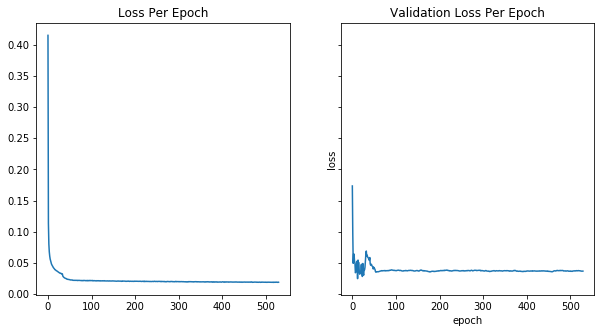

In [29]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,5), sharey=True)
losses = results.results['losses']
epochs = np.arange(len(losses))
ax1.set_title('Loss Per Epoch')
plt.xlabel('epoch')
plt.ylabel('loss')
ax1.plot(epochs, losses) #plt.subplot(122)
val_losses = results.results['validation_losses']
epochs = np.arange(len(val_losses))
plt.title(r'Validation Loss Per Epoch')
plt.xlabel('epoch')
plt.ylabel('loss')
ax2.plot(epochs, val_losses)
plt.show()


In [ ]:
from sklearn.preprocessing import minmax_scale
metric = minmax_scale(results.results['metric_per_epoch'], feature_range=(0,1))
epochs = np.arange(len(losses)) * 15
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(epochs, metric)

val_losses = minmax_scale(results.results['validation_losses'], feature_range=(0,1))
epochs = np.arange(len(val_losses))
plt.title(r'Early stopping evaluation')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(epochs, val_losses)

plt.legend(["metric", "val_loss"])
plt.show()

In [30]:
results.results['eval_summary']

{'mean_rank': None,
 'hits@k': None,
 'precision': None,
 'recall': None,
 'accuracy': None,
 'f1_score': None}

## Load and evaluate

In [31]:
import torch
import json
import os
import pykeen.constants as pkc
from pykeen.kge_models import get_kge_model
from pykeen.utilities.pipeline import Pipeline

In [32]:
model_dir = 'D:/uni/master/models/'
models = os.listdir(model_dir)
models

['hpo',
 'KG2E_FB15k_KL_dim50_lr0001_margin1_epochs1000_prediction',
 'KG2E_FB15k_KL_dim50_lr0001_margin1_epochs500',
 'KG2E_FB15k_KL_dim50_lr001_margin1_epochs500',
 'KG2E_KL_FB15k_dim20_lr0001_margin2_epochs1000',
 'KG2E_KL_FB15k_dim20_lr001_margin2_epochs1000',
 'KG2E_KL_FB15k_dim20_lr005_margin2_epochs1000',
 'KG2E_KL_FB15k_dim20_lr01_margin2_epochs1000',
 'KG2E_KL_FB15k_dim20_lr1e-05_margin2_epochs1000',
 'KG2E_KL_FB15k_dim50_lr00001_epochs1000',
 'KG2E_KL_FB15k_dim50_lr0001_margin1_epochs1000',
 'KG2E_KL_FB15k_dim50_lr1e-05_margin1_epochs1000',
 'region_1000epochs',
 'region_20epochs',
 'region_300epochs',
 'region_5epochs',
 'region_dim100_ellipse_rad0_regL01_lr0001_loss-NLL_margin0.5_singlepass-True_negfactor1_epochs500',
 'region_dim100_ellipse_rad0_regL1e-05_lr0001_loss-NLL_margin0.5_singlepass-True_negfactor1_epochs500',
 'region_dim100_ellipse_rad10_regL1e-05_lr0001_loss-NLL_margin0.0_singlepass-True_negfactor2_epochs50',
 'region_dim100_sphere_rad10_regL1e-05_lr0001_loss-M

In [33]:
model_path = ''
if model_path:
    input_directory = os.path.join(model_dir, model_path)
    results = {
    'losses': json.load(open(os.path.join(input_directory, 'losses.json'))),
    'validation_losses': json.load(open(os.path.join(input_directory, 'val_losses.json'))),
    'entity_to_embedding': json.load(open(os.path.join(input_directory, 'entities_to_embeddings.json'))),
    'relation_to_embedding': json.load(open(os.path.join(input_directory, 'relations_to_embeddings.json'))),
    'final_configuration': json.load(open(os.path.join(input_directory, 'configuration.json'))),
    'eval_summary': json.load(open(os.path.join(input_directory, 'evaluation_summary.json'))),
    'entity_to_id': json.load(open(os.path.join(input_directory, 'entity_to_id.json'))),
    'relation_to_id': json.load(open(os.path.join(input_directory, 'relation_to_id.json')))
    }
    # Initialize KG embedding model
    config = results['final_configuration']
    config['training_set_path'] = 'D:/uni/master/data/FB15K/train.tsv'
    config['test_set_path'] = 'D:/uni/master/data/FB15K/valid.tsv'
    relation_to_id = results['relation_to_id']
    entity_to_id = results['entity_to_id']
else:
    # Initialize KG embedding model
    input_directory = output_directory
    config[pkc.NUM_ENTITIES] = 14951
    config[pkc.NUM_RELATIONS] = 1345
    config[pkc.PREFERRED_DEVICE] = 'gpu'
    relation_to_id = json.load(open(os.path.join(input_directory, 'relation_to_id.json'),'r'))
    entity_to_id = json.load(open(os.path.join(input_directory, 'entity_to_id.json'),'r'))

Get evaluation results:
 * Mean rank
 * Hits@k, k $\in$ {1,3,5,10} 

In [34]:
pipeline = Pipeline(config)
if config['random_seed'] is not None:
    torch.manual_seed(config['random_seed'])
pipeline.entity_label_to_id = entity_to_id
pipeline.relation_label_to_id = relation_to_id
    
model: torch.nn.Module = get_kge_model(config=config)
model.load_state_dict(torch.load(os.path.join(input_directory, 'best_model.pkl')))

#results['trained_model'] = model 
type(model)

pykeen.kge_models.trans_e.TransE

In [35]:
metrics = [pkc.MEAN_RANK, pkc.HITS_AT_K, pkc.TRIPLE_PREDICTION] #  [pkc.MEAN_RANK, pkc.HITS_AT_K, pkc.TRIPLE_PREDICTION]

#### Evaluate RelationalTriple

In [36]:
val_results = pipeline.evaluate(
    model, 
    'D:/uni/master/data/FB15K/valid.tsv', 
    neg_test_path = 'D:/uni/master/data/FB15K/valid_neg.tsv', 
    metrics= metrics,
    threshold_search=True
)

INFO:pykeen.utilities.pipeline:-------------Start Evaluation-------------
INFO:pykeen.utilities.evaluation_utils.metrics_computations:Best accuracy 0.95 achieved on threshold: 9.28
INFO:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 544.01s seconds
INFO:pykeen.utilities.pipeline:MetricResults(mean_rank=0.20744016455369696, hits_at_k={1: 0.11251, 3: 0.23001, 5: 0.29985, 10: 0.40415}, precision=0.9504797399096028, recall=0.95892, accuracy=0.9544745369444333, fscore=0.9546812154036081)


In [37]:
val_results['eval_summary']

{'mean_rank': 0.20744016455369696,
 'hits@k': {1: 0.11251, 3: 0.23001, 5: 0.29985, 10: 0.40415},
 'precision': 0.9504797399096028,
 'recall': 0.95892,
 'accuracy': 0.9544745369444333,
 'f1_score': 0.9546812154036081}

In [38]:
model.relation_thresholds

array([11.43597844, 11.43597844, 11.43597844, ..., 11.43597844,
        7.06906481,  9.41723442])

In [39]:
test_results = pipeline.evaluate(
    model, 
    'D:/uni/master/data/FB15K/test.tsv', 
    neg_test_path = 'D:/uni/master/data/FB15K/test_neg.tsv',
    metrics= metrics,
    threshold_search=False
)

INFO:pykeen.utilities.pipeline:-------------Start Evaluation-------------
INFO:pykeen.utilities.evaluation_utils.metrics_computations:Best accuracy 0.95 achieved on threshold: 9.28
INFO:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 631.95s seconds
INFO:pykeen.utilities.pipeline:MetricResults(mean_rank=0.20741377028749763, hits_at_k={1: 0.11284725161246635, 3: 0.2307477442399824, 5: 0.2981581486685514, 10: 0.4009750977637081}, precision=0.9482987036943872, recall=0.9572886864959117, accuracy=0.9525413971758491, fscore=0.9527724890903271)


In [40]:
test_results['eval_summary']

{'mean_rank': 0.20741377028749763,
 'hits@k': {1: 0.11284725161246635,
  3: 0.2307477442399824,
  5: 0.2981581486685514,
  10: 0.4009750977637081},
 'precision': 0.9482987036943872,
 'recall': 0.9572886864959117,
 'accuracy': 0.9525413971758491,
 'f1_score': 0.9527724890903271}

In [41]:
json.dump(val_results['eval_summary'], open(os.path.join(output_directory, 'valid_evaluation_summary.json'),"w"))

In [42]:
json.dump(test_results['eval_summary'], open(os.path.join(output_directory, 'evaluation_summary.json'),"w"))

## Load results

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import json
import os

In [ ]:
%matplotlib inline

In [ ]:
model_dir = 'D:/uni/master/models/'
models = os.listdir(model_dir)
models

In [35]:
#output_directory = 'D:/uni/master/models/region_hpo/'
model_path = 'TransE_FB15k_dim50_lr001_margin1_epochs1000'
input_directory = os.path.join(model_dir, model_path)


results = {
    'losses': json.load(open(os.path.join(input_directory, 'losses.json'))),
    'validation_losses': json.load(open(os.path.join(input_directory, 'val_losses.json'))),
    'entity_to_embedding': json.load(open(os.path.join(input_directory, 'entities_to_embeddings.json'))),
    'relation_to_embedding': json.load(open(os.path.join(input_directory, 'relations_to_embeddings.json'))),
    'final_configuration': json.load(open(os.path.join(input_directory, 'configuration.json'))),
    'eval_summary': json.load(open(os.path.join(input_directory, 'evaluation_summary.json'))),
    'entity_to_id': json.load(open(os.path.join(input_directory, 'entity_to_id.json'))),
    'relation_to_id': json.load(open(os.path.join(input_directory, 'relation_to_id.json')))
}

In [36]:
results.keys()

dict_keys(['losses', 'validation_losses', 'entity_to_embedding', 'relation_to_embedding', 'final_configuration', 'eval_summary', 'entity_to_id', 'relation_to_id'])

In [37]:
results['final_configuration']

{'metrics': ['mean_rank'],
 'training_set_path': 'D:/uni/master/data/FB15K/train.tsv',
 'test_set_path': 'D:/uni/master/data/FB15K/valid.tsv',
 'mapping_path': 'D:/uni/master/data/fb15k/',
 'execution_mode': 'Training_mode',
 'random_seed': 2,
 'kg_embedding_model_name': 'TransE',
 'embedding_dim': 50,
 'scoring_function': 1,
 'normalization_of_entities': 2,
 'margin_loss': 1,
 'learning_rate': 0.01,
 'num_epochs': 1000,
 'batch_size': 1024,
 'test_batch_size': 6000,
 'filter_negative_triples': False,
 'preferred_device': 'gpu',
 'pykeen-version': '0.0.26-dev',
 'num_entities': 14951,
 'num_relations': 1345}

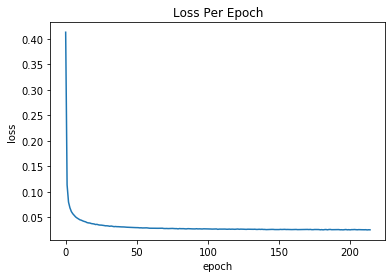

In [38]:
losses = results['losses']
epochs = np.arange(len(losses))
plt.title(r'Loss Per Epoch')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(epochs, losses)
plt.show()

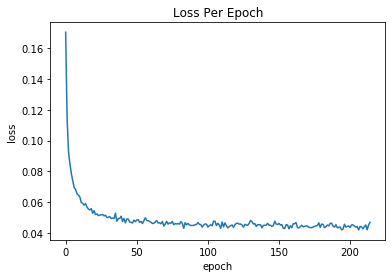

In [39]:
losses = results['validation_losses']
epochs = np.arange(len(losses))
plt.title(r'Loss Per Epoch')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(epochs, losses)
plt.show()

In [40]:
results['eval_summary']

{'mean_rank': 242.50736,
 'hits@k': {'1': 0.09983, '3': 0.20312, '5': 0.26493, '10': 0.36188},
 'precision': None,
 'recall': None,
 'accuracy': None,
 'f1_score': None}